# nlp100 chapter4

Try:http://www.cl.ecei.tohoku.ac.jp/nlp100

## 30. 形態素解析結果の読み込み
reference:http://qiita.com/taroc/items/b9afd914432da08dafc8

In [1]:
%matplotlib inline
import os
import sys
import re
import MeCab
import ngram
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
os.chdir('../../nnnnishi/nlp-100knock')

In [2]:
def to_mecab(input_file, output_file):
    mecab = MeCab.Tagger ('-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd')
    with open(input_file) as reader:
        with open(output_file, 'w') as writer:
            writer.write(mecab.parse(reader.read()))

to_mecab('data/neko.txt', 'data/neko.txt.mecab')

In [3]:
def get_morphemes(line):
    m_dic = {}
    line = re.sub(r"\t", ",", line)
    token = re.split(",", line)
    if len(token) > 7:
        m_dic['surface'] = token[0]
        m_dic['base'] = token[7]
        m_dic['pos'] = token[1]
        m_dic['pos1'] = token[2]
    else:
        m_dic['surface'] = token[0]
        m_dic['base'] = ''
        m_dic['pos'] = ''
        m_dic['pos1'] = ''
    return m_dic


def morphemes_to_sentence(morphemes):

    sentences = []
    sentence = []
    for morpheme in morphemes:
        sentence.append(morpheme)
        if morpheme['pos1'] == '句点':
            sentences.append(sentence)
            sentence = []

    return sentences

f = os.path.join('data', 'neko.txt.mecab')
with open(f) as reader:
    ms = [get_morphemes(line) for line in reader]

results = morphemes_to_sentence(ms)
print(results[0:2])

[[{'pos': '名詞', 'base': '一', 'pos1': '数', 'surface': '一'}, {'pos': '記号', 'base': '\u3000', 'pos1': '空白', 'surface': '\u3000'}, {'pos': '名詞', 'base': '吾輩は猫である', 'pos1': '固有名詞', 'surface': '吾輩は猫である'}, {'pos': '記号', 'base': '。', 'pos1': '句点', 'surface': '。'}], [{'pos': '名詞', 'base': '名前', 'pos1': '一般', 'surface': '名前'}, {'pos': '助詞', 'base': 'は', 'pos1': '係助詞', 'surface': 'は'}, {'pos': '副詞', 'base': 'まだ', 'pos1': '助詞類接続', 'surface': 'まだ'}, {'pos': '形容詞', 'base': '無い', 'pos1': '自立', 'surface': '無い'}, {'pos': '記号', 'base': '。', 'pos1': '句点', 'surface': '。'}]]


## 31. 動詞

In [4]:
def get_verb1(file):
    with open(file) as reader:
        l =[]
        for line in reader:
            line = re.sub(r"\t", ",", line)
            token = re.split(",", line)
            if len(token) > 7:
                surface = token[0]
                pos = token[1]
                if pos == '動詞':
                    l.append(surface)    
    return l

f = os.path.join('data', 'neko.txt.mecab')
results = get_verb1(f)

print(results[0:10])

['生れ', 'つか', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え', '煮']


## 32. 動詞の原形

In [5]:
def get_verb2(file):
    with open(file) as reader:
        l =[]
        for line in reader:
            line = re.sub(r"\t", ",", line)
            token = re.split(",", line)
            if len(token) > 7:
                base = token[7]
                pos = token[1]
                if pos == '動詞':
                    l.append(base)    
    return l


f = os.path.join('data', 'neko.txt.mecab')
results = get_verb2(f)

print(results[0:10])

['生れる', 'つく', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える', '煮る']


## 33. サ変名詞

In [6]:
def get_sahen_connect_noun(file):
    with open(file) as reader:
        l =[]
        for line in reader:
            line = re.sub(r"\t", ",", line)
            token = re.split(",", line)
            if len(token) > 7:
                surface = token[0]
                pos = token[1]
                pos1 = token[2]
                if pos == '名詞' and pos1 == 'サ変接続':
                    l.append(surface)    
    return l


f = os.path.join('data', 'neko.txt.mecab')
results = get_sahen_connect_noun(f)

print(results[0:10])

['見当', '記憶', 'そうだ', '話', '装飾', '突起', '運転', '記憶', 'ようやく', '分別']


## 34. 「AのB」

In [7]:
def get_morphemes(line):
    m_dic = {}
    line = re.sub(r"\t", ",", line)
    token = re.split(",", line)
    if len(token) > 7:
        m_dic['surface'] = token[0]
        m_dic['base'] = token[7]
        m_dic['pos'] = token[1]
        m_dic['pos1'] = token[2]
    else:
        m_dic['surface'] = token[0]
        m_dic['base'] = ''
        m_dic['pos'] = ''
        m_dic['pos1'] = ''
    return m_dic

f = os.path.join('data', 'neko.txt.mecab')
results = []
with open(f) as reader:
    ms = [get_morphemes(line) for line in reader]
    for i in range(len(ms)-2):
        if ms[i]['pos'] == '名詞':
            if ms[i+1]['surface'] == 'の':
                if ms[i+2]['pos'] == '名詞':
                    results.append(''.join([ms[j]['surface'] for j in range(i, i+3)]))
print(results[0:10])

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親']


## 35. 名詞の連接

In [8]:
def get_morphemes(line):
    m_dic = {}
    line = re.sub(r"\t", ",", line)
    token = re.split(",", line)
    if len(token) > 7:
        m_dic['surface'] = token[0]
        m_dic['base'] = token[7]
        m_dic['pos'] = token[1]
        m_dic['pos1'] = token[2]
    else:
        m_dic['surface'] = token[0]
        m_dic['base'] = ''
        m_dic['pos'] = ''
        m_dic['pos1'] = ''
    return m_dic

f = os.path.join('data', 'neko.txt.mecab')
results = []
continuous_noun = []
with open(f) as reader:
    ms = [get_morphemes(line) for line in reader]
    for i in range(len(ms)):
        if ms[i]['pos'] == '名詞':
            continuous_noun.append(ms[i]['surface'])
        if len(continuous_noun) > 1 and ms[i]['pos'] != '名詞':
            results.append(''.join(continuous_noun))
            continuous_noun = []
        if ms[i]['pos'] != '名詞':
            continuous_noun = []

print(results[0:100])

['した所', '人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', '邸内', '書生以外', '四五遍', 'この間おさん', '三馬', '御台所', 'まま奥', '終日書斎', '勉強家', '勉強家', '勤勉家', '二三ページ', '主人以外', '限り吾輩', '朝主人', '一番心持', '一つ床', '吾輩はいつ', '最後大変', '神経胃弱性', '言語同断', 'しようもの', '家内総がかり', '筋向', '白君', '度毎', '白君', '先日玉', '四疋', '三日目', '四疋', '白君', '我等猫族', '家族的生活', '三毛君', '我々同族間', '一番先', 'もし相手', '彼等人間', '我等', '吾人', '白君', '三毛君', 'いくら人間', 'いって人', '間違いだらけ', '後架先生', 'にも関', '月給日', '毎日毎日書斎', '人の', '自ら筆', '眼鏡越', '一室内', '以太利', '大家アンドレア・デル・サルト', '自然その物', '露華', '寒鴉', 'これ一幅', '活画', '翌日吾輩', '出て心持', '辛棒', '今吾輩', '今吾輩', '波斯産', 'ただ一種', '上不思議', '盲猫', '心中ひそか', 'あと大', '打ち壊わし', '辛棒した人', '馬鹿野郎呼わり', '平生吾輩', '元来人間', 'みんな増長', '先どこ', '数倍', '十坪', '腹加減', '吾輩はいつ', '出て浩然の気', '穏かな日', '二時頃', '昼飯後', '運動かたがた', '一本一本', '心付く', '横えて', '庭内', '忍び入り']


## 36. 単語の出現頻度

In [9]:
def get_morphemes(line):
    m_dic = {}
    line = re.sub(r"\t", ",", line)
    token = re.split(",", line)
    if len(token) > 7:
        m_dic['surface'] = token[0]
        m_dic['base'] = token[7]
        m_dic['pos'] = token[1]
        m_dic['pos1'] = token[2]
    else:
        m_dic['surface'] = token[0]
        m_dic['base'] = ''
        m_dic['pos'] = ''
        m_dic['pos1'] = ''
    return m_dic

f = os.path.join('data', 'neko.txt.mecab')
word2count = {}
with open(f) as reader:
    ms = [get_morphemes(line) for line in reader]
    for i in range(len(ms)):
        word2count.setdefault(ms[i]['surface'], 0)
        word2count[ms[i]['surface']] += 1

count = 0
for k, v in sorted(word2count.items(), key=lambda x:x[1], reverse = True):
    print(k, v)
    count += 1
    if count > 10:
        break

の 9113
。 7484
、 6772
て 6703
は 6370
に 6191
を 6069
と 5483
が 5261
た 3915
で 3793


## 37. 頻度上位10語

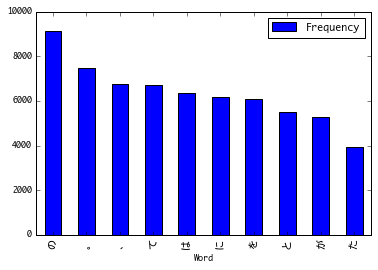

In [10]:
def get_morphemes(line):
    m_dic = {}
    line = re.sub(r"\t", ",", line)
    token = re.split(",", line)
    if len(token) > 7:
        m_dic['surface'] = token[0]
        m_dic['base'] = token[7]
        m_dic['pos'] = token[1]
        m_dic['pos1'] = token[2]
    else:
        m_dic['surface'] = token[0]
        m_dic['base'] = ''
        m_dic['pos'] = ''
        m_dic['pos1'] = ''
    return m_dic

        
font = {'family' : 'Osaka'}
matplotlib.rc('font', **font)
f = os.path.join('data', 'neko.txt.mecab')
word2count = {}
with open(f) as reader:
    ms = [get_morphemes(line) for line in reader]
    for i in range(len(ms)):
        word2count.setdefault(ms[i]['surface'], 0)
        word2count[ms[i]['surface']] += 1
freq_words = [] 
count = 0
for k, v in sorted(word2count.items(), key=lambda x:x[1], reverse = True):
    count += 1
    freq_words.append([k, v])
    if count > 9:
        break

df = pd.DataFrame(freq_words, index=None, columns=['Word', 'Frequency'])
df.plot.bar(x='Word',y='Frequency')

## 38. ヒストグラム

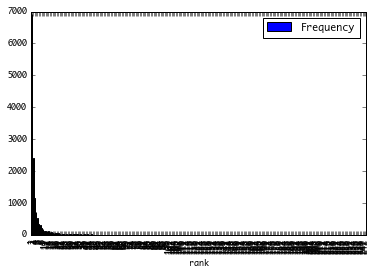

In [11]:
def get_morphemes(line):
    m_dic = {}
    line = re.sub(r"\t", ",", line)
    token = re.split(",", line)
    if len(token) > 7:
        m_dic['surface'] = token[0]
        m_dic['base'] = token[7]
        m_dic['pos'] = token[1]
        m_dic['pos1'] = token[2]
    else:
        m_dic['surface'] = token[0]
        m_dic['base'] = ''
        m_dic['pos'] = ''
        m_dic['pos1'] = ''
    return m_dic

        
font = {'family' : 'Osaka'}
matplotlib.rc('font', **font)
f = os.path.join('data', 'neko.txt.mecab')
word2count = {}
with open(f) as reader:
    ms = [get_morphemes(line) for line in reader]
    for i in range(len(ms)):
        word2count.setdefault(ms[i]['surface'], 0)
        word2count[ms[i]['surface']] += 1
freq_words = [] 
count = 0
for k, v in sorted(word2count.items(), key=lambda x:x[1], reverse = True):
    count += 1
    freq_words.append([k, v])

df = pd.DataFrame(freq_words, index=None, columns=['Word', 'Frequency'])
df = df.groupby(by='Frequency').count()
df = df.reset_index(drop=True)
df.columns = ['Frequency']
index_df = pd.DataFrame(np.arange(1, df.shape[0]+1), columns=['rank'])
df = pd.concat([df,index_df],axis=1)
df.plot.bar(x='rank',y='Frequency')

## 39. Zipfの法則

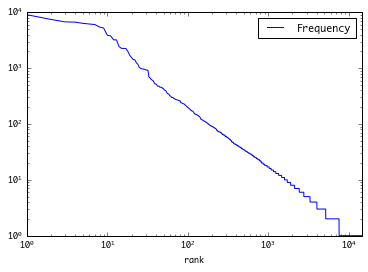

In [12]:
def get_morphemes(line):
    m_dic = {}
    line = re.sub(r"\t", ",", line)
    token = re.split(",", line)
    if len(token) > 7:
        m_dic['surface'] = token[0]
        m_dic['base'] = token[7]
        m_dic['pos'] = token[1]
        m_dic['pos1'] = token[2]
    else:
        m_dic['surface'] = token[0]
        m_dic['base'] = ''
        m_dic['pos'] = ''
        m_dic['pos1'] = ''
    return m_dic

        
font = {'family' : 'Osaka'}
matplotlib.rc('font', **font)
f = os.path.join('data', 'neko.txt.mecab')
word2count = {}
with open(f) as reader:
    ms = [get_morphemes(line) for line in reader]
    for i in range(len(ms)):
        word2count.setdefault(ms[i]['surface'], 0)
        word2count[ms[i]['surface']] += 1
freq_words = [] 
count = 0
for k, v in sorted(word2count.items(), key=lambda x:x[1], reverse = True):
    count += 1
    freq_words.append([k, v])

df = pd.DataFrame(freq_words, index=None, columns=['Word', 'Frequency'])
df.head()
index_df = pd.DataFrame(np.arange(1, df.shape[0]+1), columns=['rank'])
df = pd.concat([df['Frequency'],index_df],axis=1)
df.plot(logx=True,logy=True,x='rank',y='Frequency')